# All about rasterio 

In [2]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from rasterio import plot

In [4]:
band2=r"C:\Users\user\Downloads\GIS_self_project\Landsat image 2013\LC08_L1TP_141041_20130326_20170505_01_T1\LC08_L1TP_141041_20130326_20170505_01_T1_B2.TIF"
band3=r"C:\Users\user\Downloads\GIS_self_project\Landsat image 2013\LC08_L1TP_141041_20130326_20170505_01_T1\LC08_L1TP_141041_20130326_20170505_01_T1_B3.TIF"
band4=r"C:\Users\user\Downloads\GIS_self_project\Landsat image 2013\LC08_L1TP_141041_20130326_20170505_01_T1\LC08_L1TP_141041_20130326_20170505_01_T1_B4.TIF"
band2=rasterio.open(band2)
band3=rasterio.open(band3)
band4=rasterio.open(band4)
print(band2.count)    #to count number of band or number of array unit
print(band2.height)   #to know the number of rows in the band
print(band2.width)    #to know thr number of colums in the band
print(band3.height)
print(band3.width)



RasterioIOError: C:\Users\user\Downloads\GIS_self_project\Landsat image 2013\LC08_L1TP_141041_20130326_20170505_01_T1\LC08_L1TP_141041_20130326_20170505_01_T1_B2.TIF: No such file or directory

In [ ]:
band2_array=band2.read()
print(band2_array)

print(band2_array.shape)


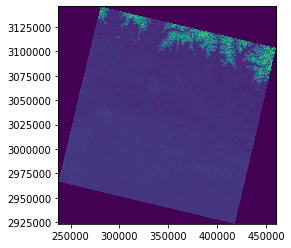

In [19]:
rasterio.plot.show(band2)

In [20]:
print(band2.dtypes)

('uint16',)


In [21]:
band2.crs

CRS.from_dict(init='epsg:32645')

In [22]:
print(band2.transform) #when you wat to convert matrix array into a raster.

print(band3.transform)

| 30.00, 0.00, 237585.00|
| 0.00,-30.00, 3146115.00|
| 0.00, 0.00, 1.00|
| 30.00, 0.00, 237585.00|
| 0.00,-30.00, 3146115.00|
| 0.00, 0.00, 1.00|


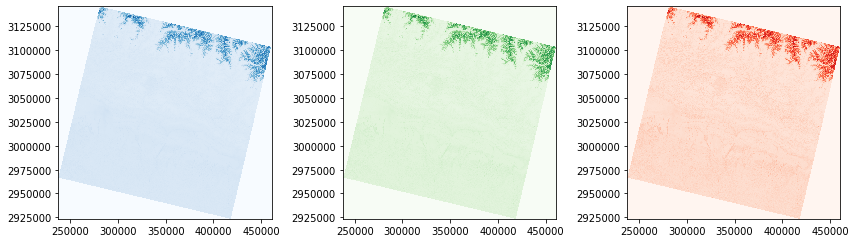

In [23]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,4))
rasterio.plot.show(band2,ax=ax1,cmap="Blues")
rasterio.plot.show(band3,ax=ax2,cmap="Greens")
rasterio.plot.show(band4,ax=ax3,cmap="Reds")

fig.tight_layout()





In [24]:
# Now lets make a layer with true color
truecolor=rasterio.open(r"C:\Users\user\Downloads\GIS_self_project\composite_band\composite_2013.tiff",
                        "w",
                        driver="Gtiff",
                        width=band2.width,
                        height=band2.height,
                        count=3,
                        crs=band2.crs,
                        transform=band2.transform,
                        dtype=band4.dtypes[0])

truecolor.write(band2.read(1),3)#blue
truecolor.write(band3.read(1),2)#green
truecolor.write(band4.read(1),1)#red
truecolor.close()

In [25]:
TRUECOLOR=r"C:\Users\user\Downloads\GIS_self_project\composite_band\composite_2013.tiff"
TRUECOLOR_open=rasterio.open(TRUECOLOR,count=2)
rasterio.plot.show(TRUECOLOR_open)

CPLE_AppDefinedError: Deleting C:\Users\user\Downloads\GIS_self_project\composite_band\composite_2013.tiff failed: Permission denied

In [ ]:
TRUECOLOR_open.count

In [ ]:
TRUECOLOR_open.height

In [ ]:
TRUECOLOR_open.width

In [ ]:
true_color_array=TRUECOLOR_open.read()
print(true_color_array)


In [ ]:
print(true_color_array.shape)